# Model Summary and Layer Plots

In [1]:
import os, pathlib

file_path = os.path.dirname(os.path.realpath("__file__"))
home_dir = pathlib.Path(file_path).parent
os.chdir(home_dir)

In [2]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model
from keras.models import Model
import numpy as np
from src.common import SAVED_PICS_PATH

SAVED_MODEL_PICS_PATH = SAVED_PICS_PATH.joinpath('models')
from src.models import get_classifier_model_compiled, get_rafae, get_cladec

tf.random.set_seed(1234)
np.random.seed(1234)

In [3]:
plot_args = dict(
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True)

# Classifier

In [4]:
classifier = get_classifier_model_compiled()
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                        

2022-06-08 14:09:22.497619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-08 14:09:22.528257: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-08 14:09:22.528473: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-08 14:09:22.529095: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

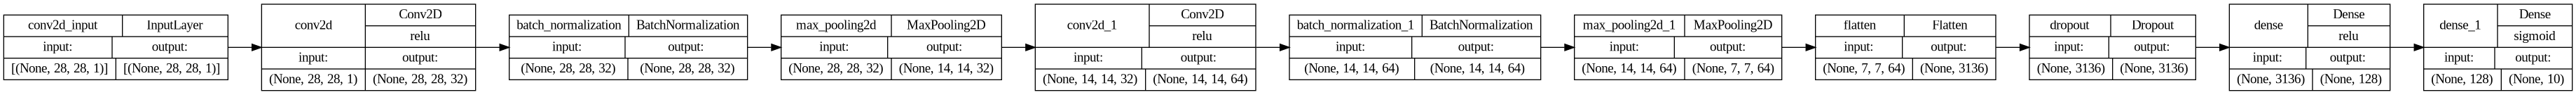

In [5]:
plot_model(classifier, to_file=SAVED_MODEL_PICS_PATH.joinpath('classifier_perfectAE_plot.png'),
           **plot_args)

# Reference Auto Encoder

## Dense

In [6]:
refae = get_rafae(add_dense=True)
refae.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_2 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 64)       256   

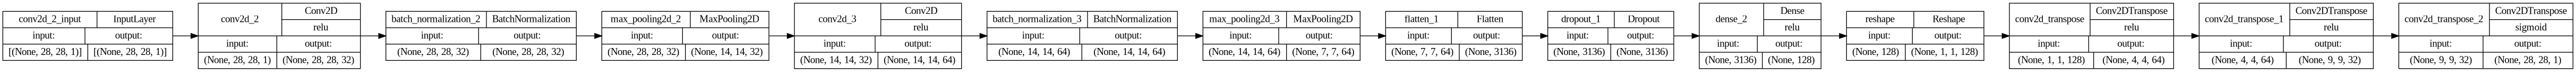

In [7]:
plot_model(refae, to_file=SAVED_MODEL_PICS_PATH.joinpath('refae_perfectAE_dense_plot.png'),
           **plot_args)

## Conv

In [8]:
refae = get_rafae(add_dense=False)
refae.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_4 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 14, 14, 64)       256 

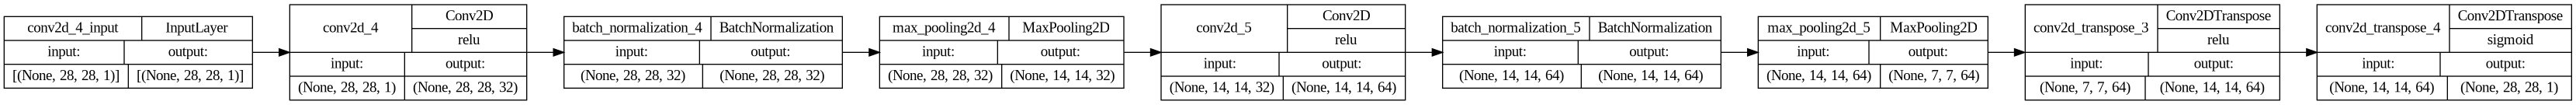

In [9]:
plot_model(refae, to_file=SAVED_MODEL_PICS_PATH.joinpath('refae_perfectAE_conv_plot.png'),
           **plot_args)

# ClaDec

## Dense

In [10]:
claDec = get_cladec(classifier, alpha=0.0, isDense=True)
claDec.summary()  # note that the classifier is used in loss but not part of training

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128)]        0           []                               
                                                                                                  
 reshape_1 (Reshape)            (None, 1, 1, 128)    0           ['input_1[0][0]']                
                                                                                                  
 conv2d_transpose_5 (Conv2DTran  (None, 4, 4, 64)    131136      ['reshape_1[0][0]']              
 spose)                                                                                           
                                                                                                  
 conv2d_transpose_6 (Conv2DTran  (None, 9, 9, 32)    18464       ['conv2d_transpose_5[0][0]'

In [11]:
# get actual decoder
claDec = Model(claDec.input[0], claDec.output)

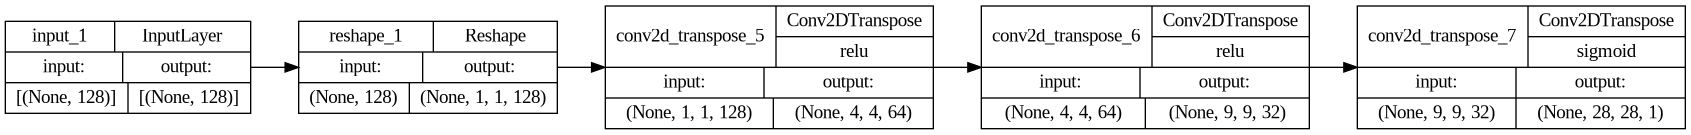

In [12]:
plot_model(claDec, to_file=SAVED_MODEL_PICS_PATH.joinpath('cladec_perfectAE_dense_plot.png'),
           **plot_args)

## Conv

In [13]:
claDec = get_cladec(classifier, alpha=0.0, isDense=False)
claDec.summary()  # note that the classifier is used in loss but not part of training

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 7, 7, 64)]   0           []                               
                                                                                                  
 conv2d_transpose_8 (Conv2DTran  (None, 14, 14, 64)  65600       ['input_4[0][0]']                
 spose)                                                                                           
                                                                                                  
 input_6 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 28, 28)]     0           []                         

In [14]:
# get actual decoder
claDec = Model(claDec.input[0], claDec.output)

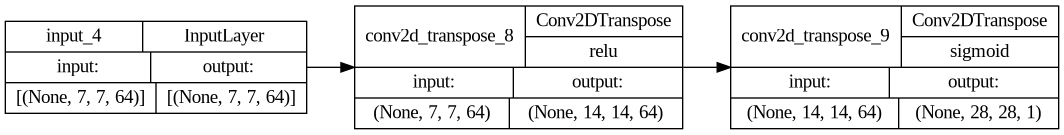

In [15]:
plot_model(claDec, to_file=SAVED_MODEL_PICS_PATH.joinpath('cladec_perfectAE_conv_plot.png'),
           **plot_args)